In [24]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
    
paths = [f.path for f in os.scandir('target/criterion/') if f.is_dir()]
paths.remove('target/criterion/report')

input_sizes = [1, 2, 8, 16, 32, 64, 128, 256]

report = {}

for path in paths:
    path_end = path.split('/')[-1].split(' ')
    function_name = path_end[0]
        
    for size in input_sizes:
        with open(os.path.join(path, str(size), 'base', 'estimates.json'), 'r') as f:
            data = json.load(f)
            
            if function_name not in report:
                report[function_name] = {}
            
            
#             report[function_name][scale][size] = {
#                 'mean': data['mean']['point_estimate'],
#                 'median': data['median']['point_estimate']
#             }
            
            report[function_name][size] = data['median']['point_estimate']
        

print(report)

{'cost_add': {1: 3348683.3125, 2: 4208348.166666666, 8: 10226053.1, 16: 17228667.666666664, 32: 36710276.75, 64: 76103345.5, 128: 151751243.5, 256: 408374136.0}}


In [25]:
df = pd.DataFrame(report)
df

,cost_add
1,3.348683e+06
2,4.208348e+06
8,1.022605e+07
16,1.722867e+07
32,3.671028e+07
64,7.610335e+07
128,1.517512e+08
256,4.083741e+08


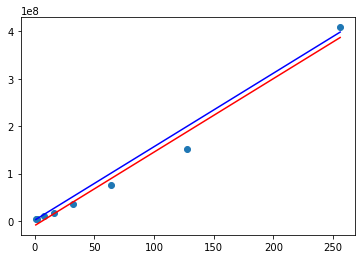

In [27]:
X = df.index.values.reshape(-1, 1)
Y = df.iloc[:, 0].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

b = max(Y[0] - linear_regressor.coef_, 0)
a = linear_regressor.coef_

Z = a*X + b

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.plot(X, Z, color='blue')
plt.show()